In [39]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import cv2
import skimage

# Load Greek Characters Dataset and Labels (Any combination of greek letters)

In [40]:
greek_data_path = r"/floyd/input/greek_1_16/Images"
greek_list = os.listdir(greek_data_path) 
num_greek_samples = np.size(greek_list)
print(num_greek_samples)
greek_list.sort()
greek_labels = np.loadtxt('/floyd/input/greek_1_16/labels.csv', delimiter=',', skiprows=0)
greek_labels = greek_labels.astype(np.uint8)
greek_labels = greek_labels[:,4]
print(len(greek_labels))

10000
10000


In [41]:
im = Image.open(greek_data_path + '/' + greek_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(greek_list)
print(m, n, num_images)
greek_images = np.array([np.array(Image.open(greek_data_path + '/' + fname)) for fname in greek_list])

100 100 10000


#  Load 1-9 Character Dataset (Test set)

In [42]:
test_data_path = r"/floyd/input/greek1_9_proper"
test_list = os.listdir(test_data_path) 
num_test_samples = np.size(test_list)
print(num_test_samples)
test_list.sort()
test_labels = np.loadtxt('/floyd/input/greek_1_9/labels.csv', delimiter=',', skiprows=0)
test_labels = test_labels.astype(np.uint8)
test_labels = test_labels[:,4]
print(len(test_labels))

2000
2000


In [43]:
im = Image.open(test_data_path + '/' + test_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(test_list)
print(m, n, num_images)
test_images = np.array([np.array(Image.open(test_data_path + '/' + fname)) for fname in test_list])

100 100 2000


# Visualise datasets

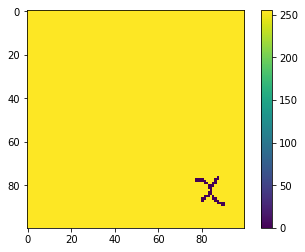

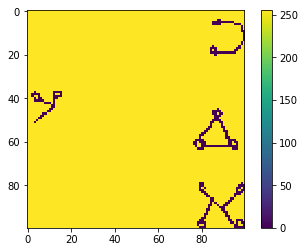

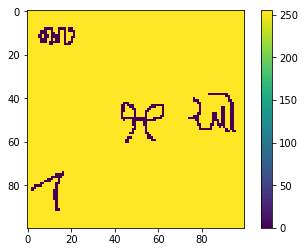

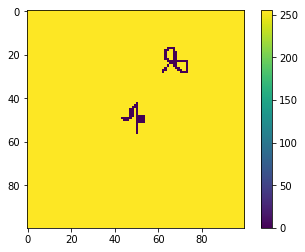

In [48]:
plt.figure()
plt.imshow(greek_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Split Greek and Omniglot_background into train/test for models 1 + 3

In [49]:
greek_train, greek_validation, greek_train_labels, greek_validation_labels = train_test_split(greek_images, 
                                                                                              greek_labels, 
                                                                                              test_size=0.2)

# Normalise and make RGB for Reset

In [50]:
greek_train = greek_train / 255.0
greek_validation = greek_validation / 255.0

# Convnet

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model1 = Sequential()
#add model layers
model1.add(Conv2D(8000, kernel_size=3, activation=’relu’, input_shape=(m,n,1)), kernel_initializer='random_uniform')
model1.add(Conv2D(4000, kernel_size=3, activation=’relu’, kernel_initializer='random_uniform'))
model1.add(Conv2D(2000, kernel_size=3, activation=’relu’, kernel_initializer='random_uniform'))
model1.add(Conv2D(1000, kernel_size=3, activation=’relu’, kernel_initializer='random_uniform'))
model1.add(Conv2D(500, kernel_size=3, activation=’relu’, kernel_initializer='random_uniform'))
model1.add(Conv2D(250, kernel_size=3, activation=’relu’, kernel_initializer='random_uniform'))
model1.add(Flatten())
model1.add(Dense(100, activation=’relu’))
model1.add(Dense(50, activation=’relu’))
model1.add(Dense(1, activation=’linear’))

model1.compile(loss = "mse",
               optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
               metrics=["accuracy"])

In [ ]:
layer_outputs_random = [layer.output for layer in model1.layers[1:]]
activation_model_random = models.Model(inputs=model1.input, outputs=layer_outputs_random)
activations_random = activation_model_random.predict(greek_validation) 

In [ ]:
activation_model_random.summary()
print(np.shape(activations_random))

In [ ]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

shallow_layer_randomweights = activations_random[0]
pca = decomposition.PCA()
pca_results_random_greek = pca.fit_transform(shallow_layer_randomweights) 
var_exp_randomweights = pca.explained_variance_ratio_.cumsum()

plt.plot(var_exp_randomweights)
plt.axvline(x=2, c='red')


In [55]:
plt.scatter(pca_results_random_greek[:,0], pca_results_random_greek[:,1], c=greek_labels[0:300], cmap='inferno')
plt.colorbar(label='Num Characters')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show

/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.
